In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import seaborn as sns

In [2]:
import tensorflow as tf
from tensorflow import keras

In [36]:
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()

In [37]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [38]:
from sklearn.model_selection import train_test_split
x_train_full,x_test,y_train_full,y_test=train_test_split(housing.data,housing.data,random_state=42)
x_train,x_valid,y_train,y_valid=train_test_split(x_train_full,y_train_full,random_state=42)

In [39]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_valid=scaler.transform(x_valid)
x_test=scaler.transform(x_test)

In [40]:
np.random.seed(42)
tf.random.set_seed(42)

In [41]:
x_train.shape

(11610, 8)

In [46]:
model=keras.models.Sequential([keras.layers.Dense(30,activation='relu',input_shape=[8]), 
                              keras.layers.Dense(30,activation='relu'), 
                              keras.layers.Dense(1)])

In [47]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 30)                270       
                                                                 
 dense_10 (Dense)            (None, 30)                930       
                                                                 
 dense_11 (Dense)            (None, 1)                 31        
                                                                 
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.compile(loss='mean_squared_error', 
             optimizer=keras.optimizers.SGD(learning_rate=1e-3),
             metrics=['mae'])

In [49]:
model_history=model.fit(x_train,y_train,epochs=20, 
                       validation_data=(x_valid,y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 393895.8750 - mae: 225.3649 - val_loss: 442733.4062 - val_mae: 251.2422
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 379681.2188 - mae: 267.8394 - val_loss: 437054.3750 - val_mae: 284.1517
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 376771.5000 - mae: 291.3883 - val_loss: 435687.7188 - val_mae: 300.0126
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 376089.0000 - mae: 302.6012 - val_loss: 435343.0312 - val_mae: 307.7696
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 375927.5625 - mae: 308.0005 - val_loss: 435251.0000 - val_mae: 311.6240
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 375890.5625 - mae: 311.0677 - val_loss: 435227.7188 - val_mae: 313.2506
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 375882.3438 - mae: 312.0543 - val_loss: 435218.750

In [50]:
mae_test=model.evaluate(x_test,y_test)

162/162 [==============================] - 0s 2ms/step - loss: 375638.8125 - mae: 312.6625


In [51]:
model_history.history

{'loss': [393895.875,
  379681.21875,
  376771.5,
  376089.0,
  375927.5625,
  375890.5625,
  375882.34375,
  375880.1875,
  375879.75,
  375879.53125,
  375879.71875,
  375879.53125,
  375879.5625,
  375879.65625,
  375879.21875,
  375879.5,
  375879.5625,
  375879.40625,
  375879.3125,
  375879.65625],
 'mae': [225.36492919921875,
  267.8394470214844,
  291.3883361816406,
  302.6011962890625,
  308.0005187988281,
  311.0676574707031,
  312.0543212890625,
  312.8365783691406,
  313.1494140625,
  312.9723815917969,
  313.3402099609375,
  313.30859375,
  313.20184326171875,
  313.56768798828125,
  313.3764343261719,
  313.04266357421875,
  313.19635009765625,
  313.4863586425781,
  313.1722106933594,
  313.4159240722656],
 'val_loss': [442733.40625,
  437054.375,
  435687.71875,
  435343.03125,
  435251.0,
  435227.71875,
  435218.75,
  435216.21875,
  435215.3125,
  435213.75,
  435213.8125,
  435213.71875,
  435213.21875,
  435214.15625,
  435214.46875,
  435213.375,
  435212.84375,
 

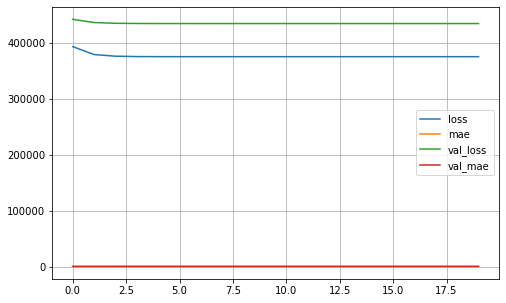

In [52]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
#plt.gca().set_ylim(0,366)

plt.show()

In [53]:
x_new=x_test[:3]

In [54]:
y_pred=model.predict(x_new)
print(y_pred)
print(y_test[:3])

[[172.81892]
 [172.81892]
 [172.81892]]
[[ 1.68120000e+00  2.50000000e+01  4.19220056e+00  1.02228412e+00
   1.39200000e+03  3.87743733e+00  3.60600000e+01 -1.19010000e+02]
 [ 2.53130000e+00  3.00000000e+01  5.03938356e+00  1.19349315e+00
   1.56500000e+03  2.67979452e+00  3.51400000e+01 -1.19460000e+02]
 [ 3.48010000e+00  5.20000000e+01  3.97715472e+00  1.18587747e+00
   1.31000000e+03  1.36033229e+00  3.78000000e+01 -1.22440000e+02]]


### Functional API

In [55]:
del model

In [56]:
keras.backend.clear_session()# free up resources for our net coding (model)

In [57]:
input_=keras.layers.Input(shape=x_train.shape[1:])
hidden1=keras.layers.Dense(30,activation='relu')(input_)
hidden2=keras.layers.Dense(30,activation='relu')(hidden1)
concat=keras.layers.concatenate([input_,hidden2])
output=keras.layers.Dense(1)(concat)
model=keras.models.Model(inputs=[input_],outputs=[output])

In [58]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 30)           930         ['dense[0][0]']                  
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_1[0][0]']            

In [59]:
y_train.shape

(11610, 8)

In [60]:
model.compile(loss="mean_squared_error", 
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["mae"])

In [61]:
model_history=model.fit(x_train,y_train,batch_size=64, epochs=30,validation_data=(x_valid,y_valid))

Epoch 1/30
182/182 [==============================] - 1s 3ms/step - loss: 392095.4062 - mae: 219.6371 - val_loss: 435110.9375 - val_mae: 228.0151
Epoch 2/30
182/182 [==============================] - 0s 3ms/step - loss: 407034.5000 - mae: 250.5113 - val_loss: 423619.5625 - val_mae: 251.9246
Epoch 3/30
182/182 [==============================] - 0s 2ms/step - loss: 366257.2188 - mae: 258.8140 - val_loss: 416913.1875 - val_mae: 271.4178
Epoch 4/30
182/182 [==============================] - 0s 2ms/step - loss: 361687.0625 - mae: 276.7119 - val_loss: 412596.1250 - val_mae: 295.9197
Epoch 5/30
182/182 [==============================] - 0s 2ms/step - loss: 359532.2188 - mae: 288.5203 - val_loss: 410962.5000 - val_mae: 293.4125
Epoch 6/30
182/182 [==============================] - 0s 2ms/step - loss: 358541.6562 - mae: 293.7179 - val_loss: 409622.8438 - val_mae: 300.4352
Epoch 7/30
182/182 [==============================] - 0s 2ms/step - loss: 357932.5312 - mae: 299.6379 - val_loss: 408803.625

### Saving and Restoring

In [62]:
model.save("my_Func_model.h5")

In [63]:
%pwd

'C:\\Users\\USER'

In [64]:
del model

In [65]:
keras.backend .clear_session()

In [66]:
model=keras.models.load_model("my_Func_model.h5")

In [67]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 30)           930         ['dense[0][0]']                  
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_1[0][0]']            

In [68]:
y_pred=model.predict(x_new)
print(y_pred)

[[167.51888]
 [190.70618]
 [161.30902]]


### Using call backs during training

In [71]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [73]:
model=keras.models.Sequential([keras.layers.Dense(30,activation='relu',input_shape=[8]),
                              keras.layers.Dense(30,activation='relu'),
                              keras.layers.Dense(1)
])

In [74]:
model.compile(loss="mse",optimizer=keras.optimizers.SGD(lr=1e-3))

C:\Users\USER\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [75]:
checkpoint_cb=keras.callbacks.ModelCheckpoint("Model-{epoch:02d}.h5")

In [77]:
history=model.fit(x_train,y_train,epochs=10, 
                 validation_data=(x_valid,y_valid),
                 callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 393895.8750 - val_loss: 442733.4062
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 379681.2188 - val_loss: 437054.3750
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 376771.5000 - val_loss: 435687.7188
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 376089.0000 - val_loss: 435343.0312
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 375927.5625 - val_loss: 435251.0000
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 375890.5625 - val_loss: 435227.7188
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 375882.3438 - val_loss: 435218.7500
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 375880.1875 - val_loss: 435216.2188
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 375879.7500 - val_loss: 435215.3125
Epoch 10/1

In [78]:
del model
keras.backend.clear_session()

In [79]:
model=keras.models.load_model("my_Func_model.h5")

In [81]:
mse_test=model.evaluate(x_test,y_test)

162/162 [==============================] - 0s 2ms/step - loss: 356847.9375 - mae: 312.2017


### Best Model

In [95]:
del model
keras.backend.clear_session()

In [96]:
model=keras.models.Sequential([keras.layers.Dense(30,activation='relu',input_shape=[8]),
                              keras.layers.Dense(30,activation='relu'),
                              keras.layers.Dense(1)
])

In [97]:
model.compile(loss="mse",optimizer=keras.optimizers.SGD(lr=1e-3))

In [109]:
checkpoint_cb=keras.callbacks.ModelCheckpoint("early_stop_model.h5",save_best_only=True)

In [110]:
history=model.fit(x_train,y_train,epochs=10, 
                 validation_data=(x_valid,y_valid),
                 callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 375879.4375 - val_loss: 432719.0938
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 375879.5312 - val_loss: 432719.2812
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 375879.5312 - val_loss: 432719.8438
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 375879.5000 - val_loss: 432719.6562
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 375879.4062 - val_loss: 432719.2500
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 375879.2500 - val_loss: 432719.8750
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 375879.5312 - val_loss: 432719.7812
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 375879.2188 - val_loss: 432720.1250
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 375879.2500 - val_loss: 432720.2812
Epoch 10/1

In [111]:
early_stopping_cb=keras.callbacks.EarlyStopping(patience=10, 
                                               restore_best_weights=True)
# patience:Number of epochs with no improvement after which training will be stopped

In [112]:
history=model.fit(x_train,y_train,epochs=200, 
                 validation_data=(x_valid,y_valid),
                 callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/200
363/363 [==============================] - 1s 2ms/step - loss: 375879.4375 - val_loss: 432719.4688
Epoch 2/200
363/363 [==============================] - 1s 2ms/step - loss: 375879.3125 - val_loss: 432719.6562
Epoch 3/200
363/363 [==============================] - 1s 2ms/step - loss: 375879.6562 - val_loss: 432719.8438
Epoch 4/200
363/363 [==============================] - 1s 2ms/step - loss: 375879.4062 - val_loss: 432719.7188
Epoch 5/200
363/363 [==============================] - 1s 2ms/step - loss: 375879.3125 - val_loss: 432719.2188
Epoch 6/200
363/363 [==============================] - 1s 2ms/step - loss: 375879.3125 - val_loss: 432719.9062
Epoch 7/200
363/363 [==============================] - 1s 2ms/step - loss: 375879.5000 - val_loss: 432719.7812
Epoch 8/200
363/363 [==============================] - 1s 2ms/step - loss: 375879.1875 - val_loss: 432720.1250
Epoch 9/200
363/363 [==============================] - 1s 2ms/step - loss: 375879.2500 - val_loss: 432720.2812
E

In [113]:
model=keras.models.load_model("early_stop_model.h5")
mse_test=model.evaluate(x_test,y_test)

162/162 [==============================] - 0s 1ms/step - loss: 375639.1562
